<a href="https://colab.research.google.com/github/yuyunt7/ODL-Assignment/blob/yuyun_branch/TP060191_MLP_2HL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2

# feature scaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# for fixing the imbalanced dataset and split
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
print('df shape is: {}'.format(df.shape))

df shape is: (253680, 22)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# checking if there missing values
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Checking duplicate
duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [7]:
#Drop duplications in dataframe
df.drop_duplicates(inplace=True)

In [8]:
#recheck duplication drop duplications
df.duplicated().sum()

0

In [9]:
df.shape

(229474, 22)

In [10]:
# drop column
df = df.drop(['AnyHealthcare','Education'], axis=1);

In [11]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in df.columns if var not in bool_vars and var != 'Diabetes_binary']

In [12]:
for name in df.columns:
    df[name] = df[name].astype(int)
    print(name , df[name].unique())

Diabetes_binary [0 1]
HighBP [1 0]
HighChol [1 0]
CholCheck [1 0]
BMI [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker [1 0]
Stroke [0 1]
HeartDiseaseorAttack [0 1]
PhysActivity [0 1]
Fruits [0 1]
Veggies [1 0]
HvyAlcoholConsump [0 1]
NoDocbcCost [0 1]
GenHlth [5 3 2 4 1]
MentHlth [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk [1 0]
Sex [0 1]
Age [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Income [3 1 8 6 4 7 2 5]


In [13]:
df[num_vars].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,28.687507,2.601820,3.509866,4.681219,8.085068,5.888615
std,6.789204,1.064962,7.717643,9.050877,3.094451,2.092888
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000
50%,27.000000,3.000000,0.000000,0.000000,8.000000,6.000000
75%,32.000000,3.000000,2.000000,4.000000,10.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,8.000000


1     35097
0    194377
Name: Diabetes_binary, dtype: int64
1    15.294543%
0    84.705457%
Name: Diabetes_binary, dtype: object



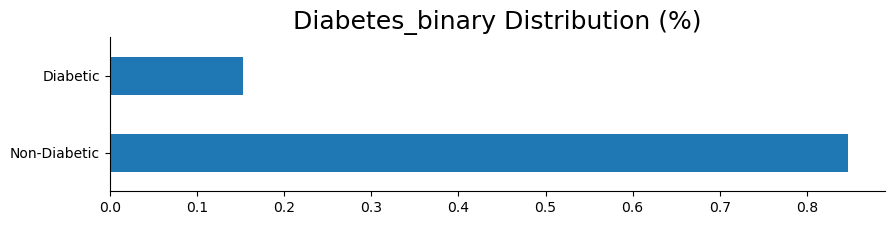

In [14]:
print(df['Diabetes_binary'].value_counts(ascending=True))
print(df['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [15]:
from sklearn.utils import resample

In [16]:
# deal with imbalance

# Separate majority and minority classes
df_majority = df[df.Diabetes_binary==0]
df_minority = df[df.Diabetes_binary==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # sample without replacement
                                 n_samples=35097,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

0    35097
1    35097
Name: Diabetes_binary, dtype: int64
0    50.000000%
1    50.000000%
Name: Diabetes_binary, dtype: object



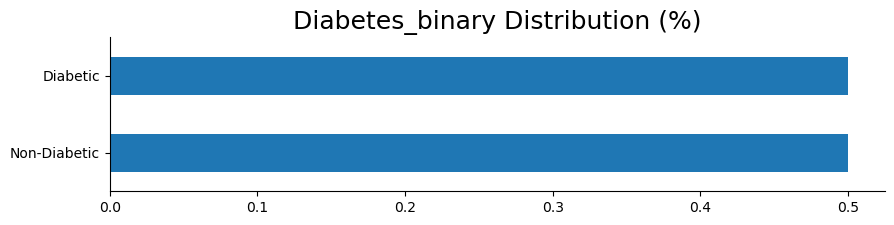

In [17]:
print(df_downsampled['Diabetes_binary'].value_counts(ascending=True))
print(df_downsampled['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df_downsampled['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [18]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (df_downsampled.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()


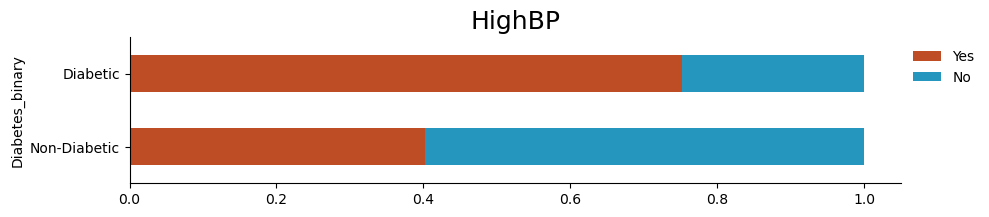

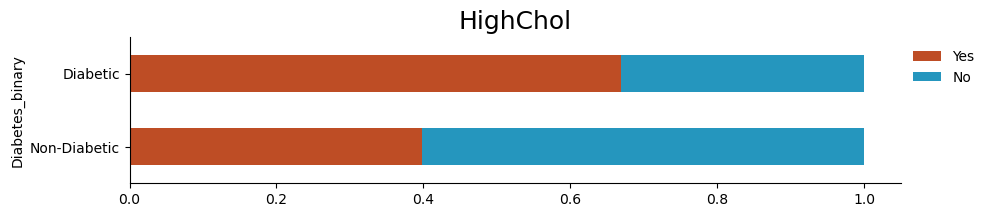

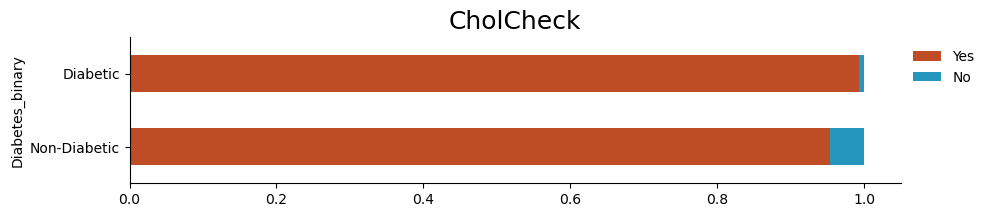

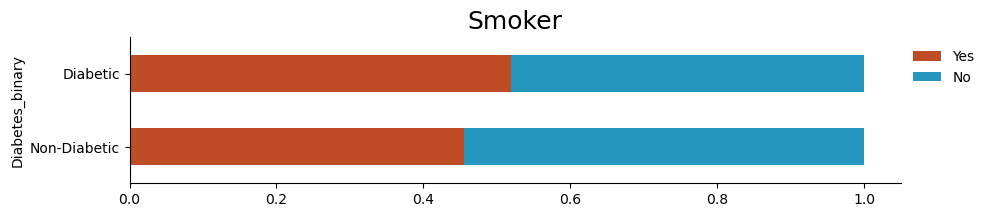

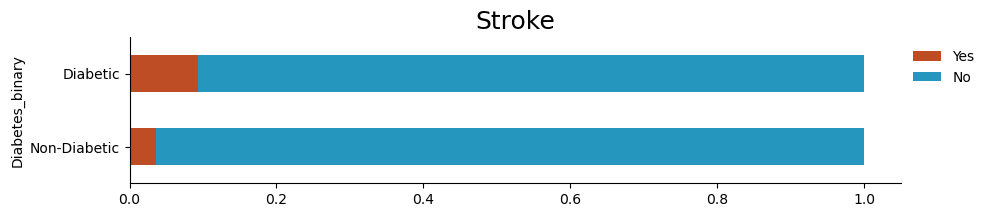

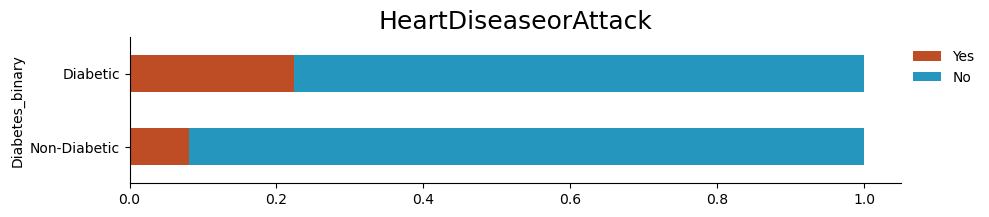

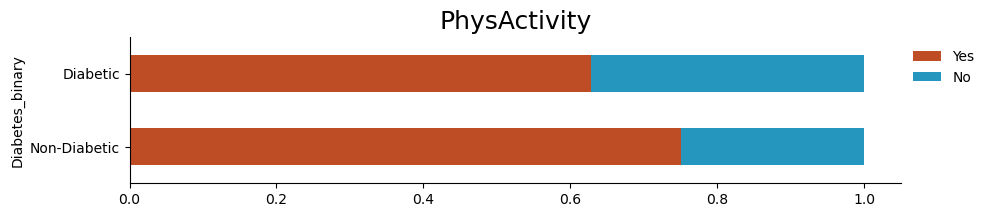

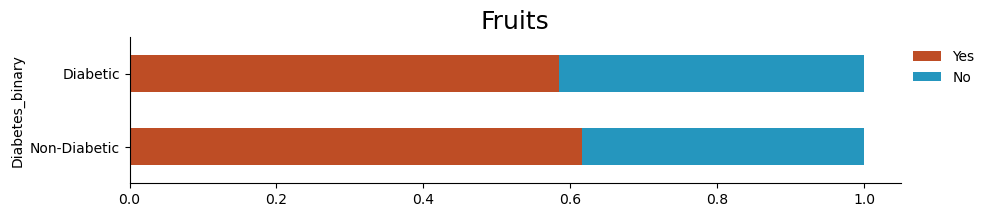

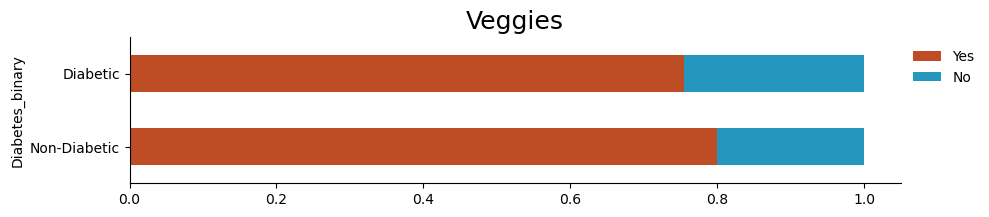

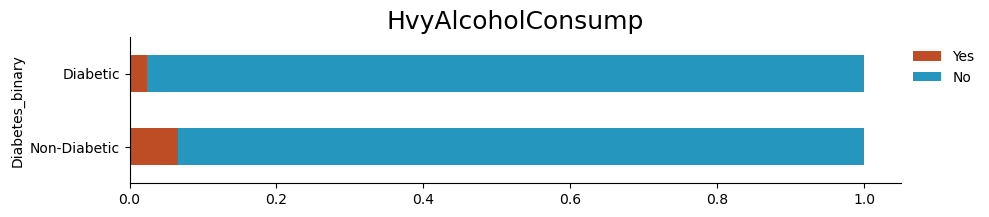

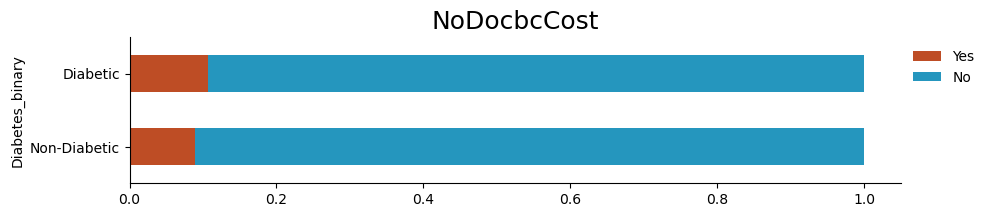

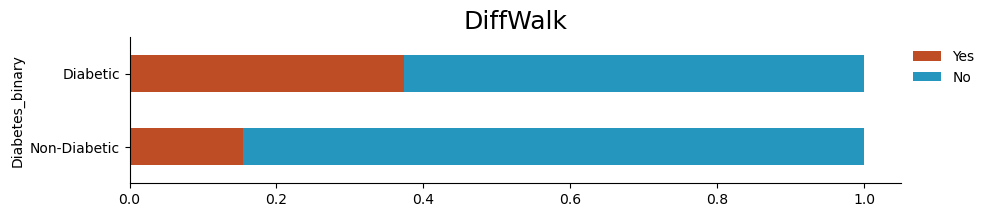

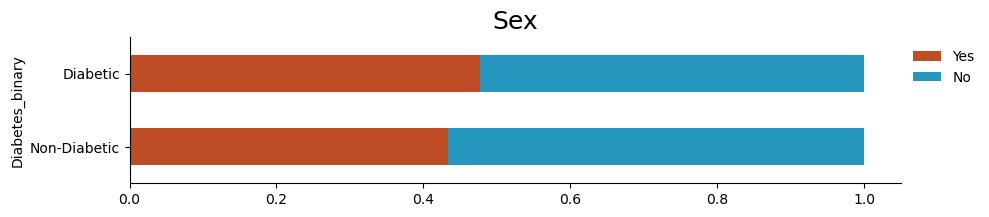

In [19]:
for var in bool_vars:
    analyse_cat(var)

In [20]:
df_downsampled[num_vars].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Income
count,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000,70194.000000
mean,30.057213,2.887782,3.885161,6.078924,8.626720,5.609069
std,7.249857,1.096832,8.227791,10.204747,2.869584,2.169677
min,13.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,25.000000,2.000000,0.000000,0.000000,7.000000,4.000000
50%,29.000000,3.000000,0.000000,0.000000,9.000000,6.000000
75%,33.000000,4.000000,3.000000,7.000000,11.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,8.000000


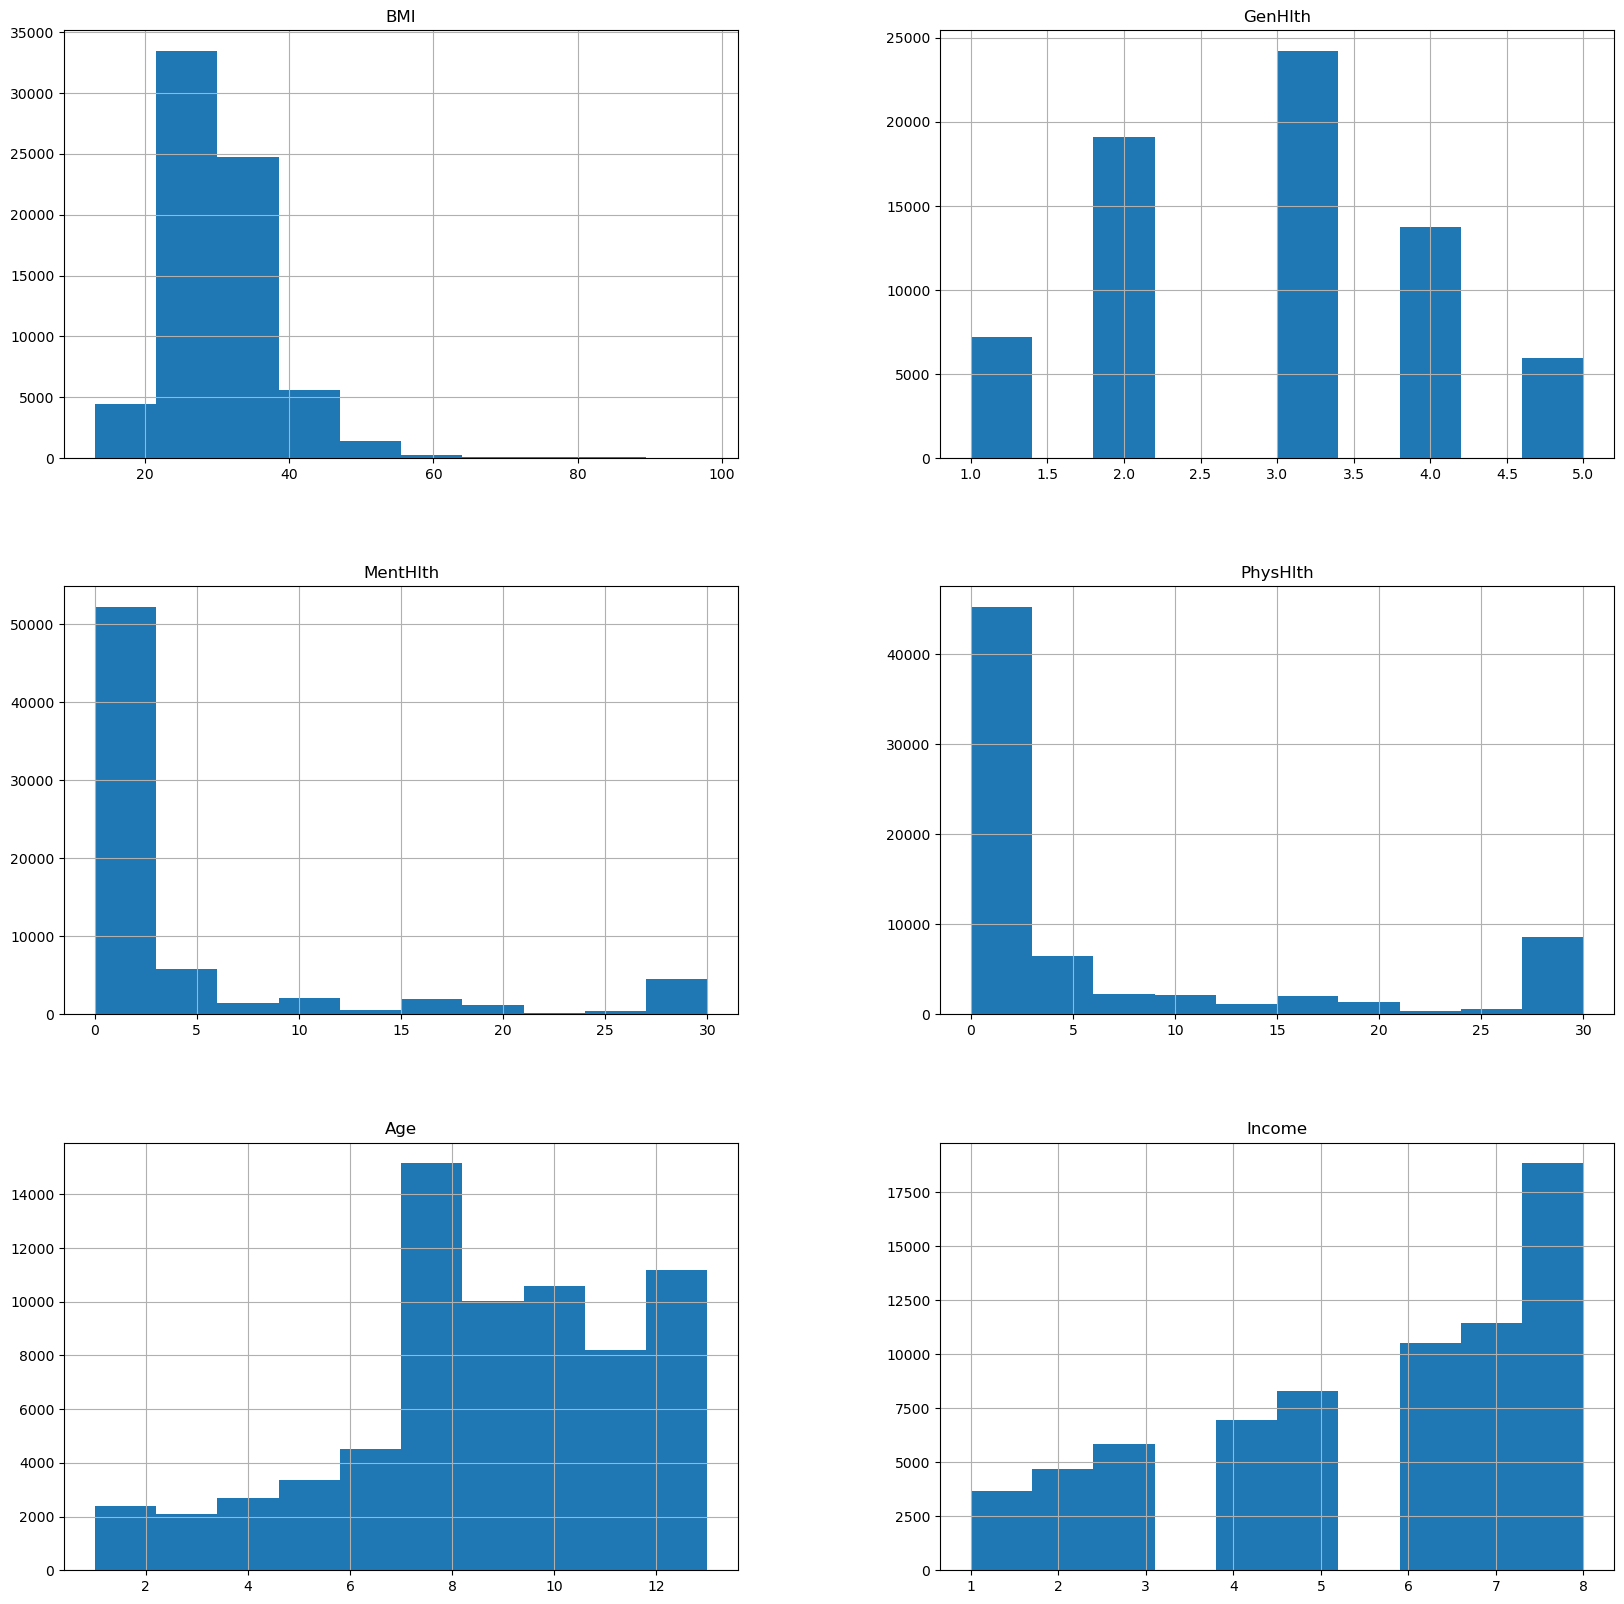

In [21]:
df_downsampled[num_vars].hist(figsize=(20,20));

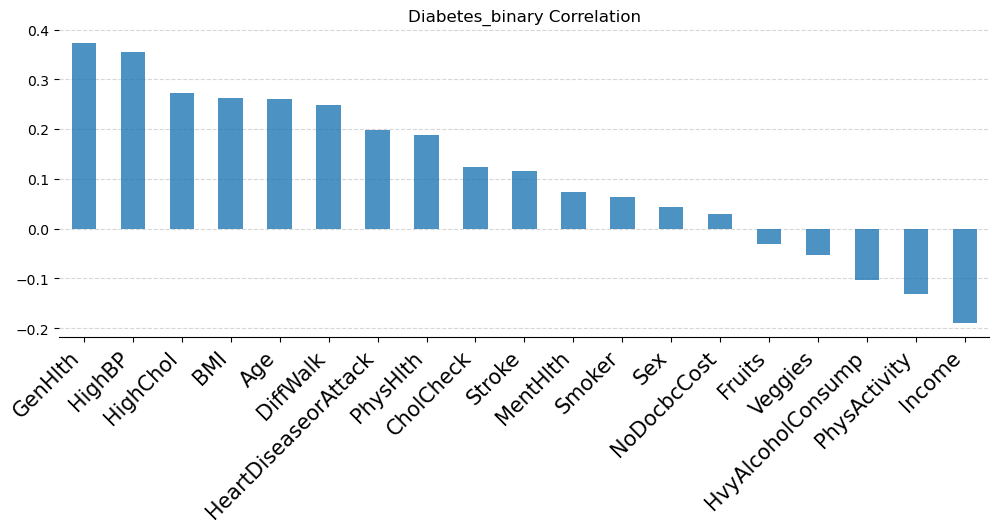

In [22]:
(df_downsampled.drop('Diabetes_binary', axis=1)
   .corrwith(df.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

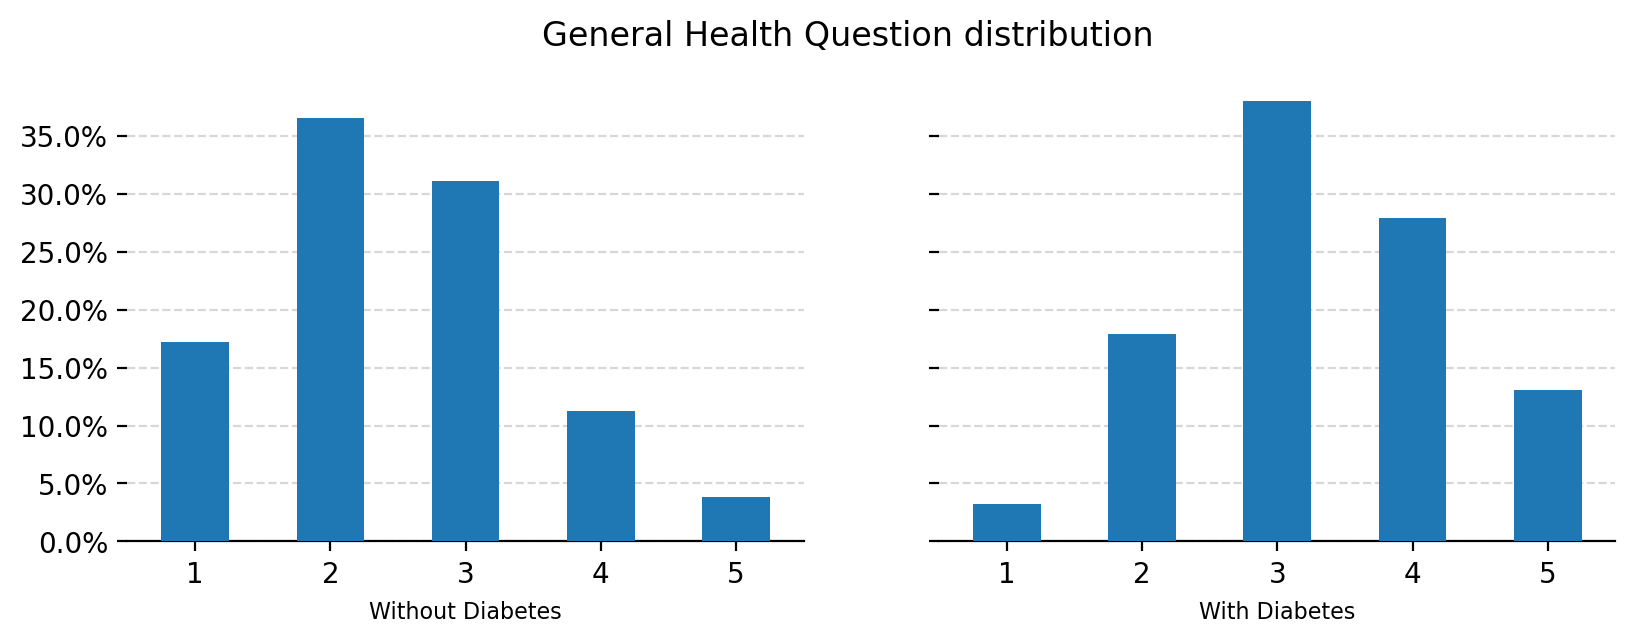

In [23]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('General Health Question distribution')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['GenHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);


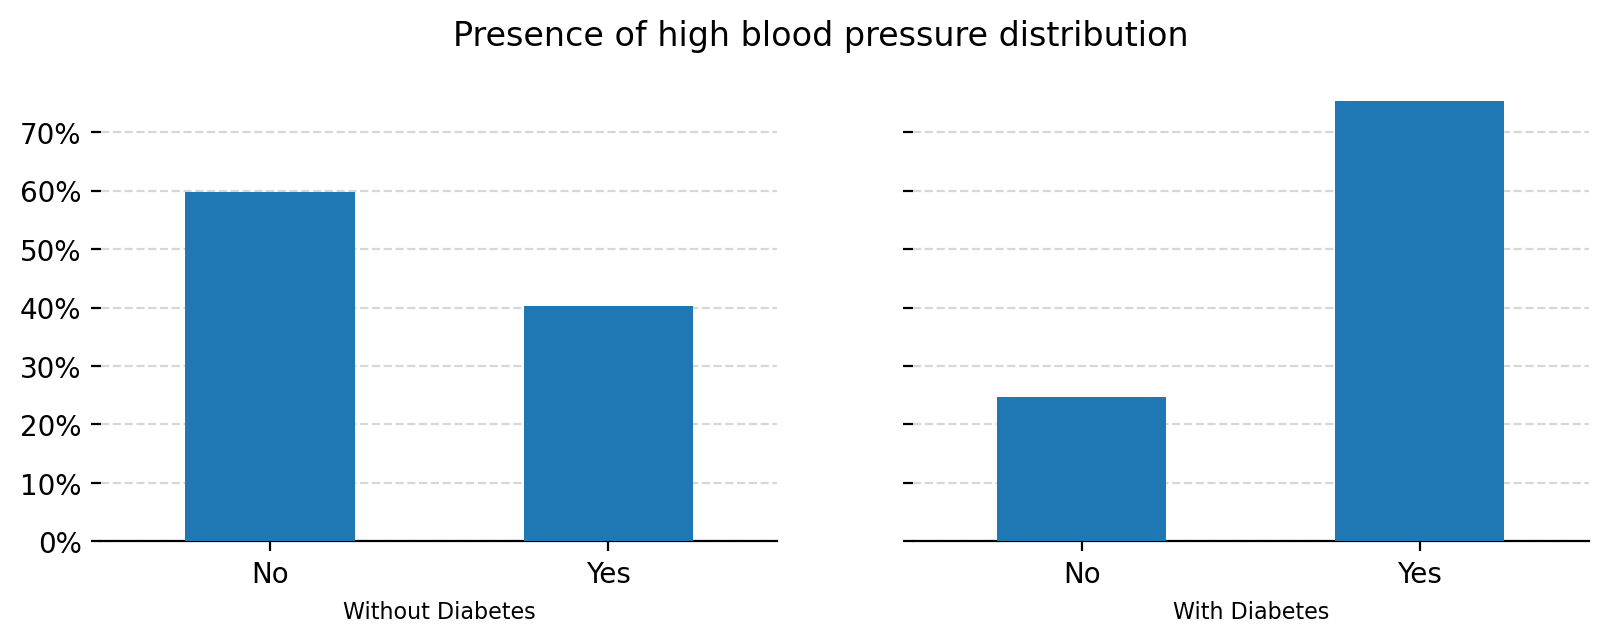

In [24]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of high blood pressure distribution')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);


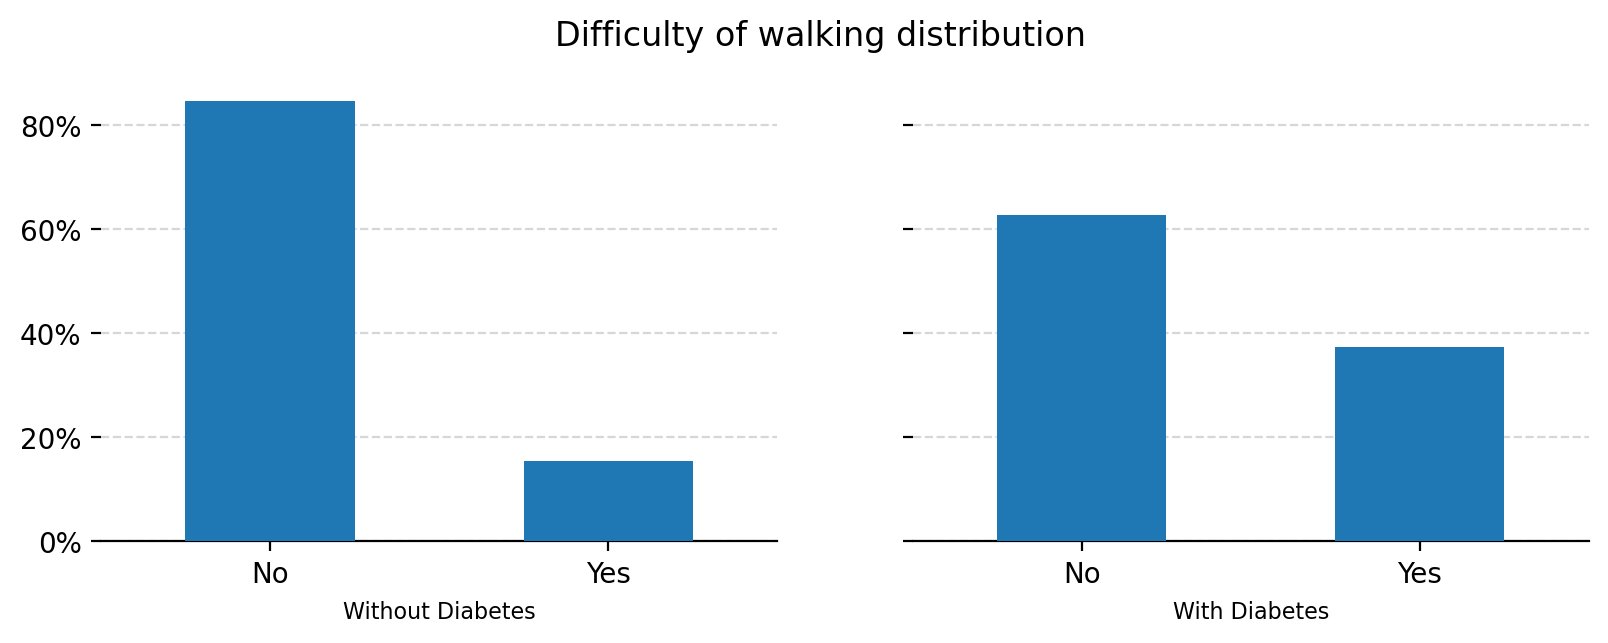

In [25]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Difficulty of walking distribution')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

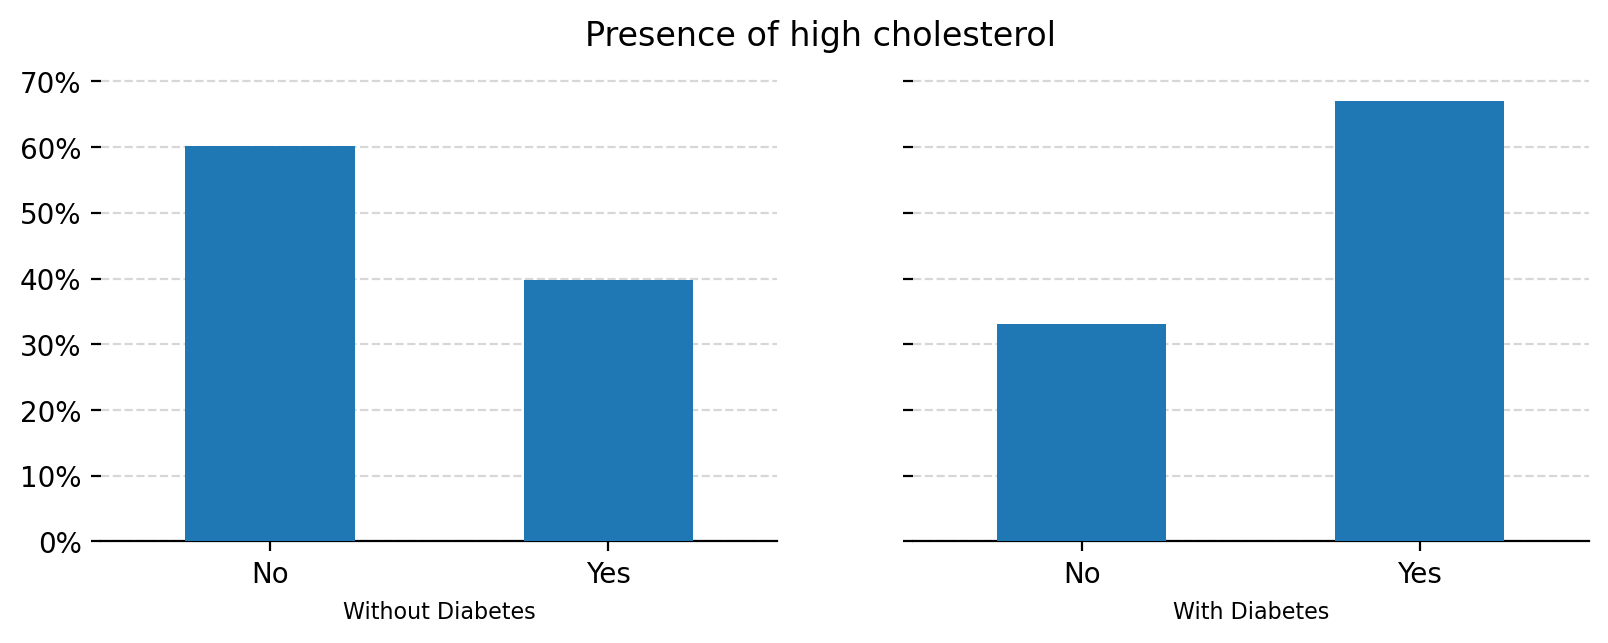

In [26]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of high cholesterol')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

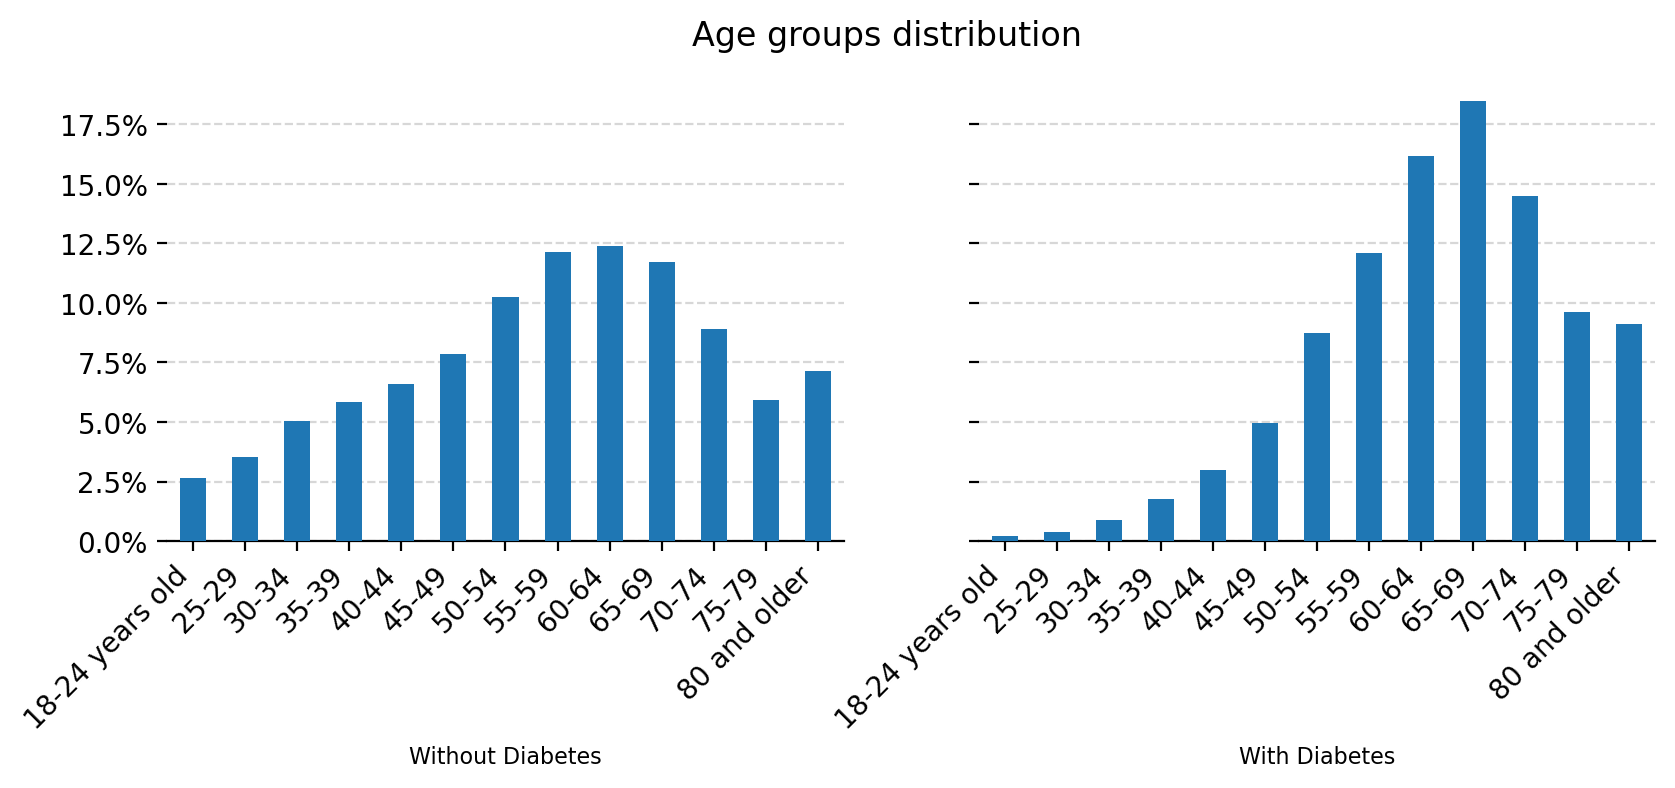

In [27]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Age groups distribution')
age_groups = ['18-24 years old', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74',
              '75-79', '80 and older']


(df_downsampled[df_downsampled['Diabetes_binary']==False]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(df_downsampled[df_downsampled['Diabetes_binary']==True]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

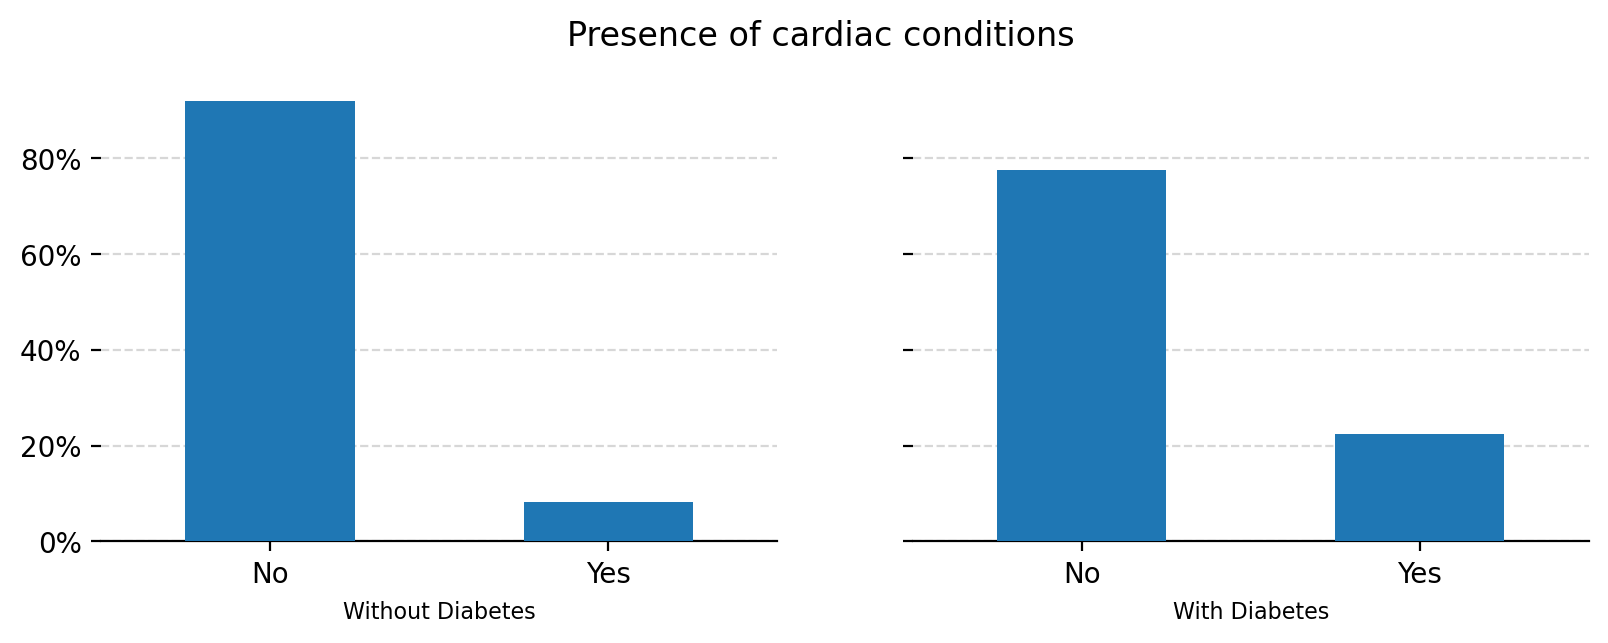

In [28]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Presence of cardiac conditions')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);


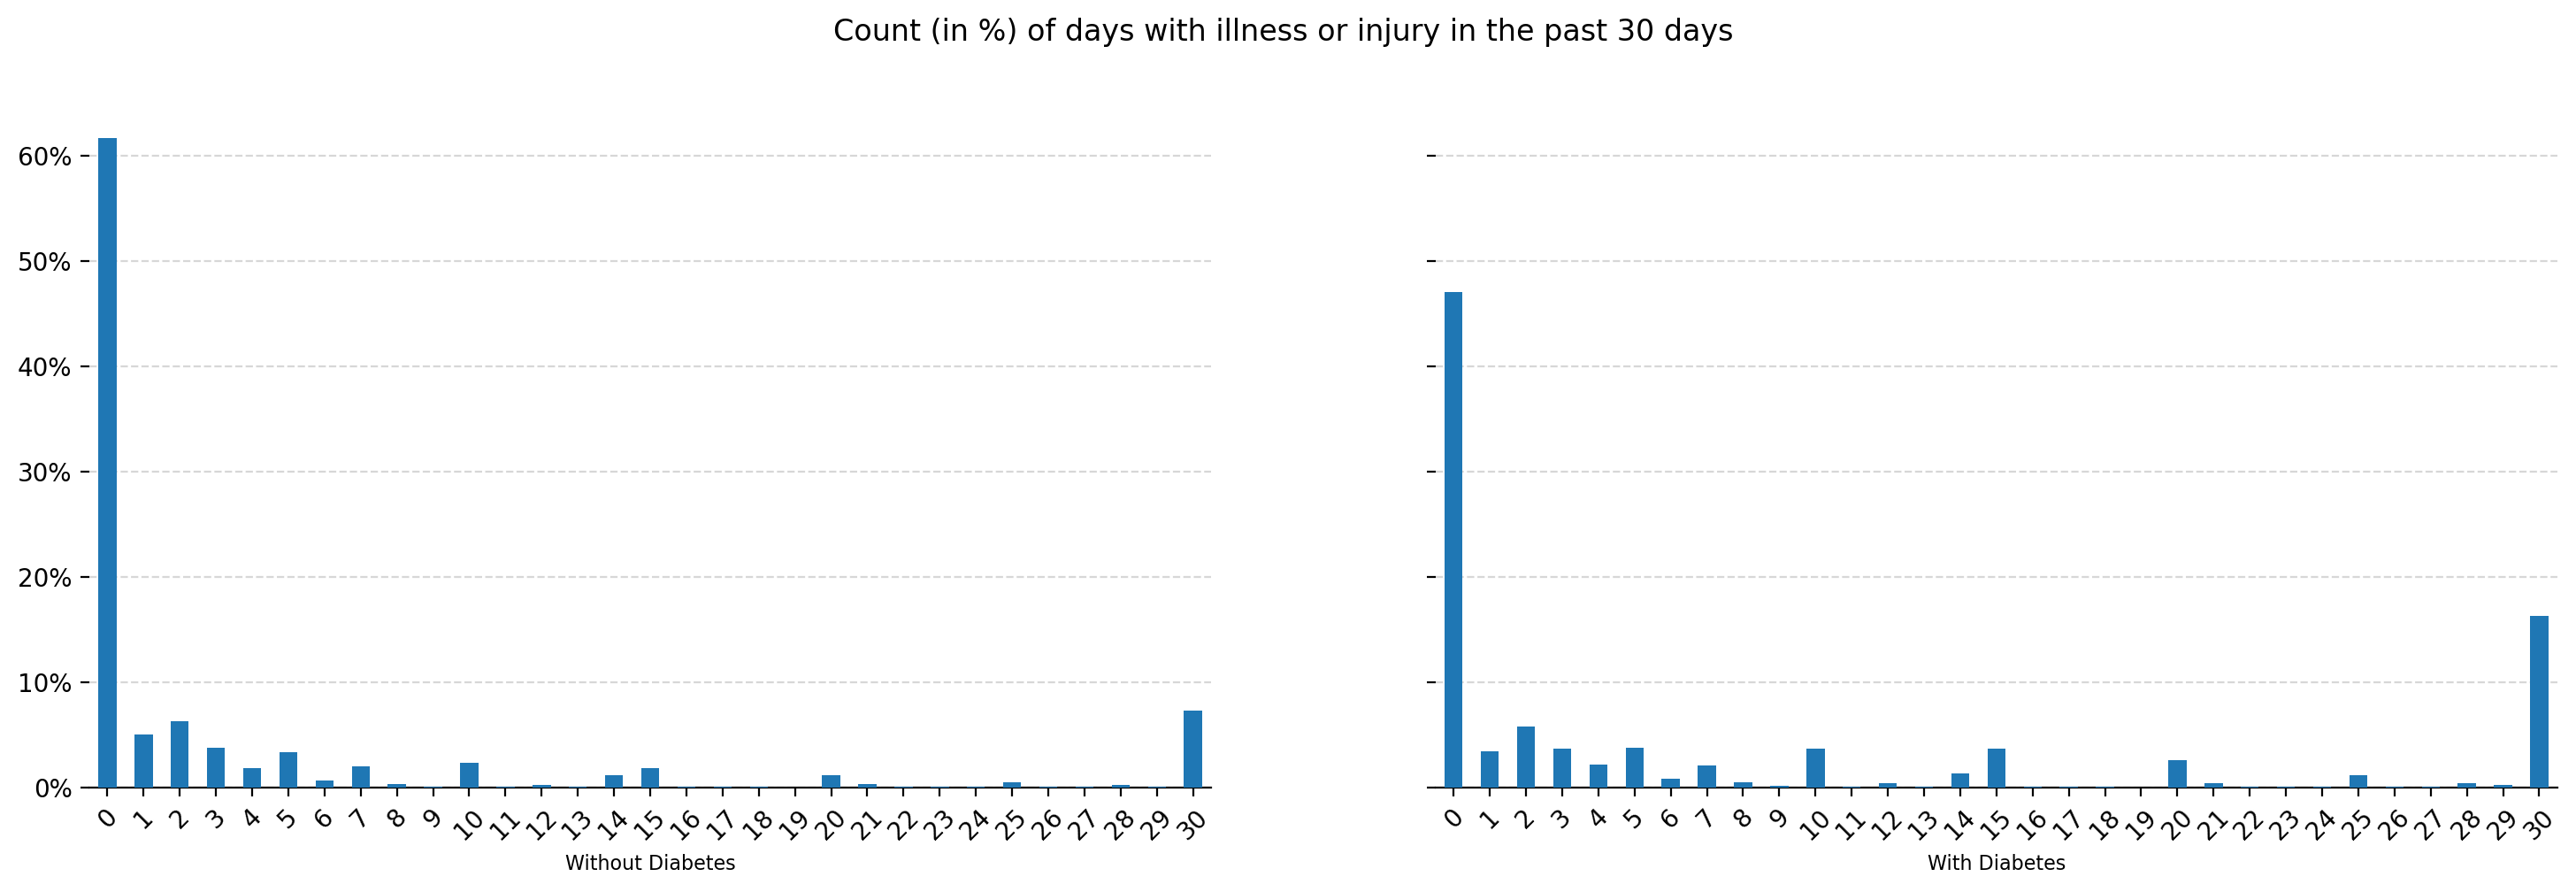

In [29]:
ratio = 5
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.6,ratio), dpi=200, sharey=True)
fig.suptitle('Count (in %) of days with illness or injury in the past 30 days')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.grid(axis='y', linestyle='--', alpha=.5)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

(df_downsampled[df_downsampled['Diabetes_binary']==True]['PhysHlth']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);


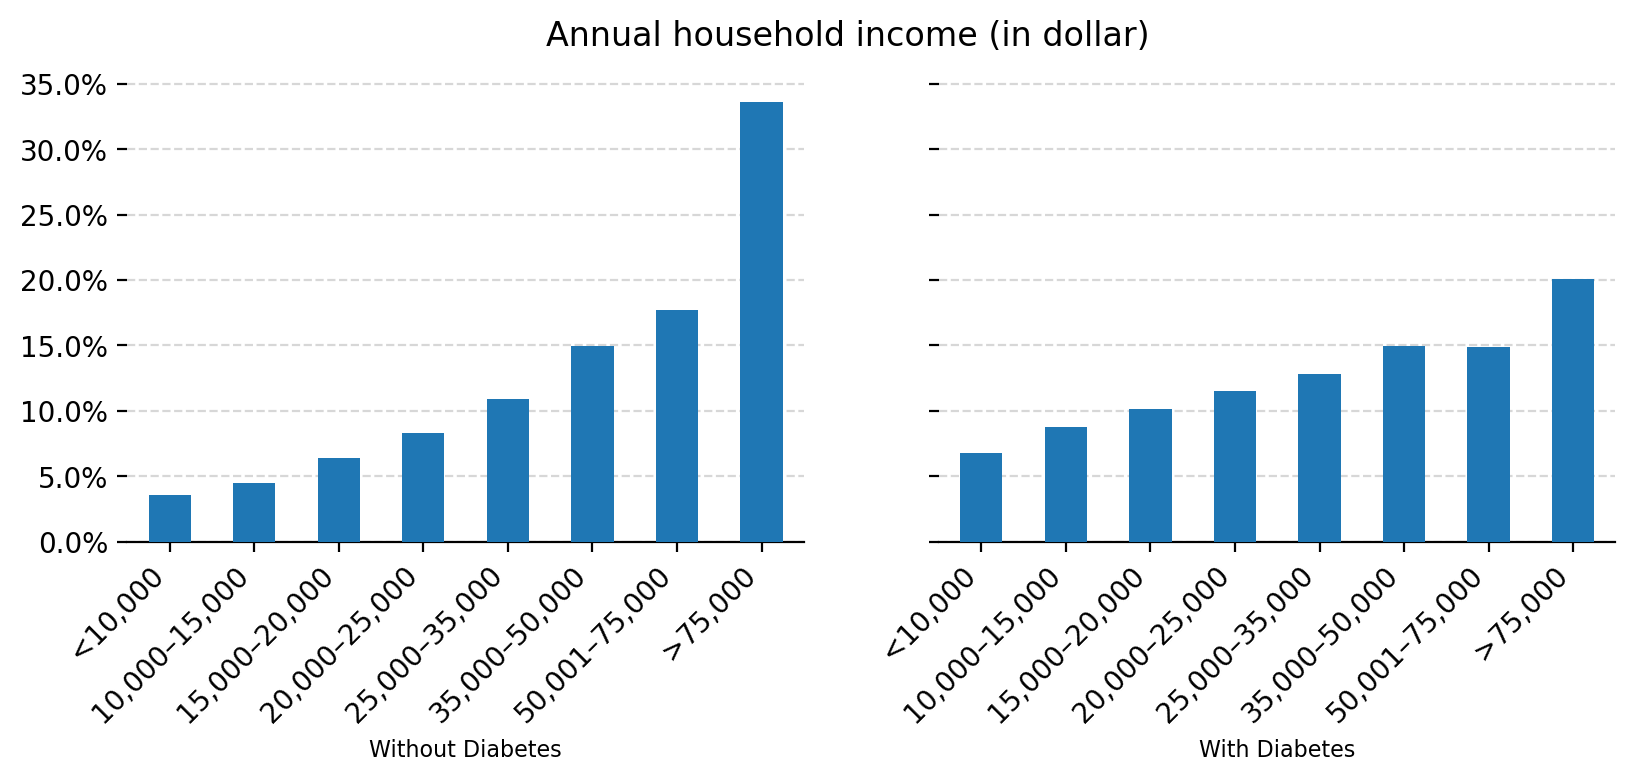

In [30]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Annual household income (in dollar)')
income_groups = ['<10,000', '10,000–15,000', '15,000–20,000',
                 '20,000–25,000', '25,000–35,000', '35,000–50,000',
                 '50,001–75,000', '>75,000']

(df_downsampled[df_downsampled['Diabetes_binary']==False]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(income_groups)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)


(df_downsampled[df_downsampled['Diabetes_binary']==True]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(income_groups)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)

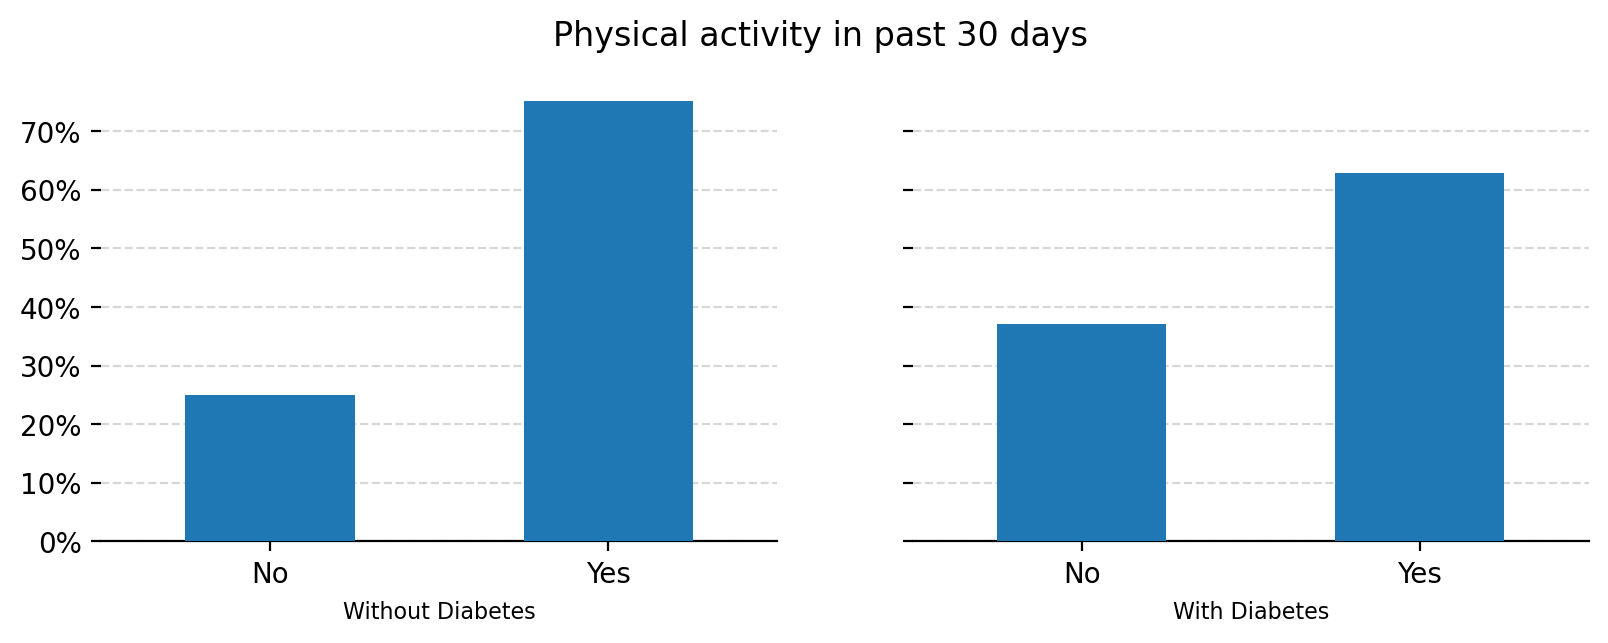

In [31]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Physical activity in past 30 days')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

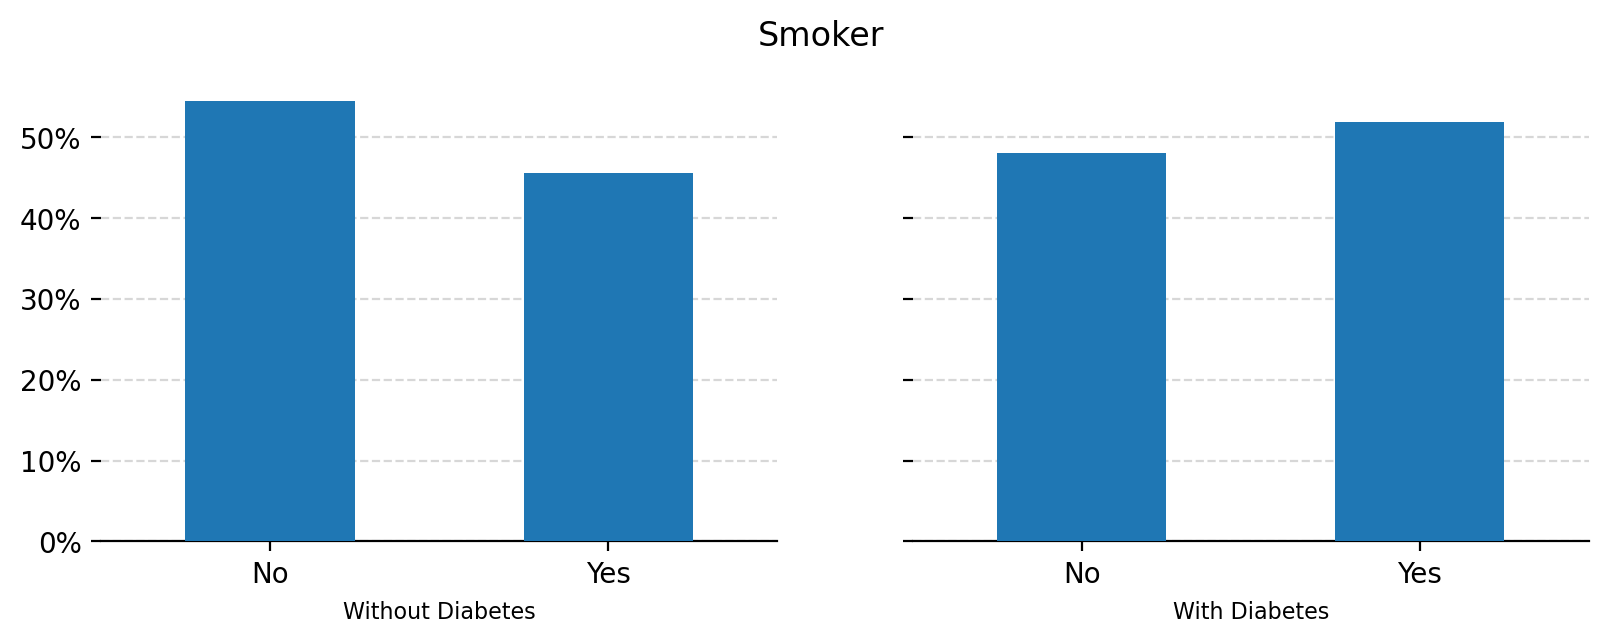

In [32]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Smoker')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);


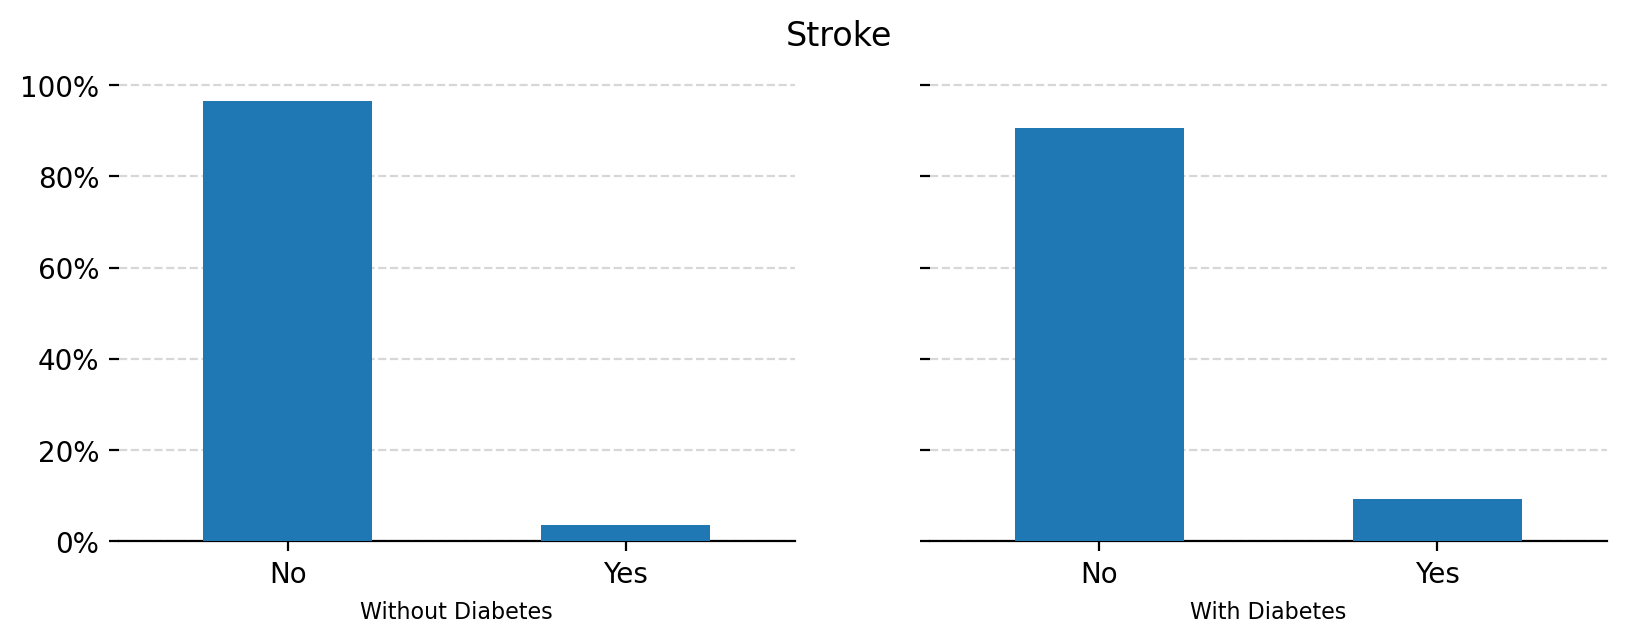

In [33]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Stroke')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);


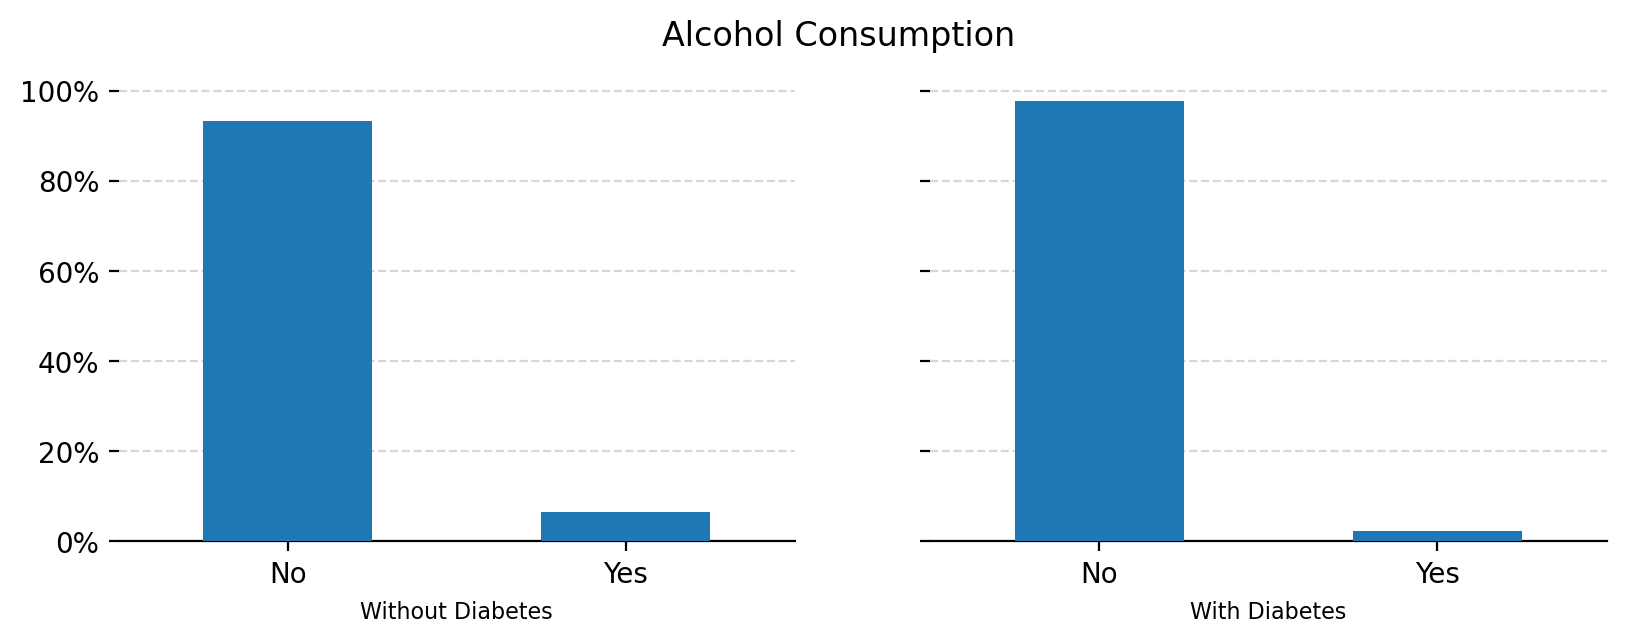

In [34]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Alcohol Consumption')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

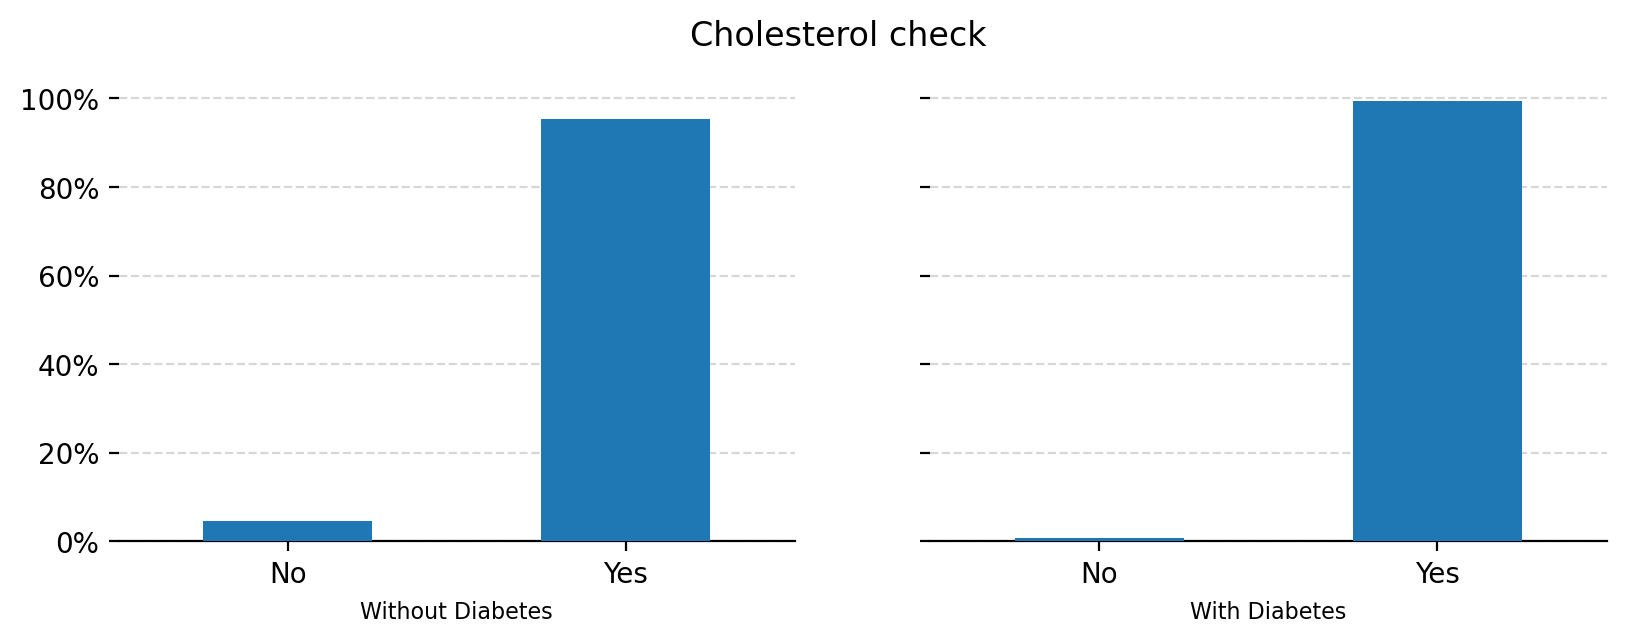

In [35]:
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=200, sharey=True)
fig.suptitle('Cholesterol check')

(df_downsampled[df_downsampled['Diabetes_binary']==False]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)

(df_downsampled[df_downsampled['Diabetes_binary']==True]['CholCheck']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

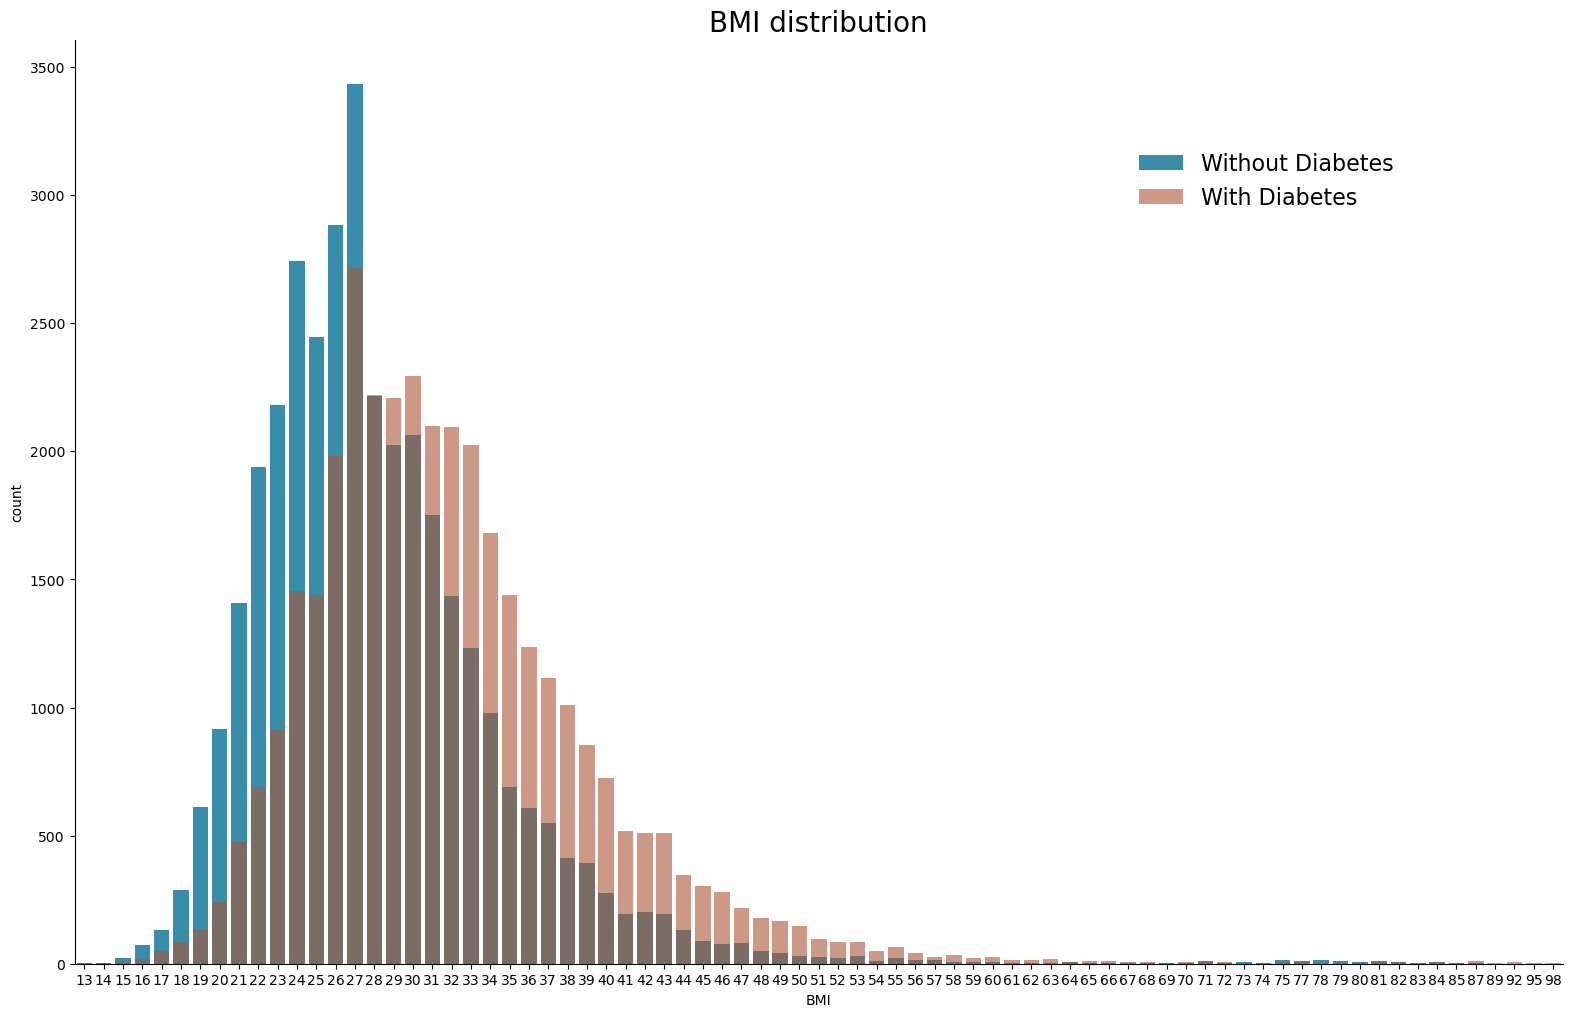

In [36]:
ratio = 12
plt.figure(figsize=(ratio*1.6,ratio))
colors = ['#be4d25','#2596be']

sns.countplot(x=(df_downsampled[df_downsampled['Diabetes_binary']==False]['BMI']), color=colors[1], label="Without Diabetes")
sns.countplot(x=(df_downsampled[df_downsampled['Diabetes_binary']==True]['BMI']), color=colors[0], label="With Diabetes", alpha = 0.6 )
sns.despine()
plt.title("BMI distribution", size=20)
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':16});

## explaination: skewness (positively skewed)

<Axes: >

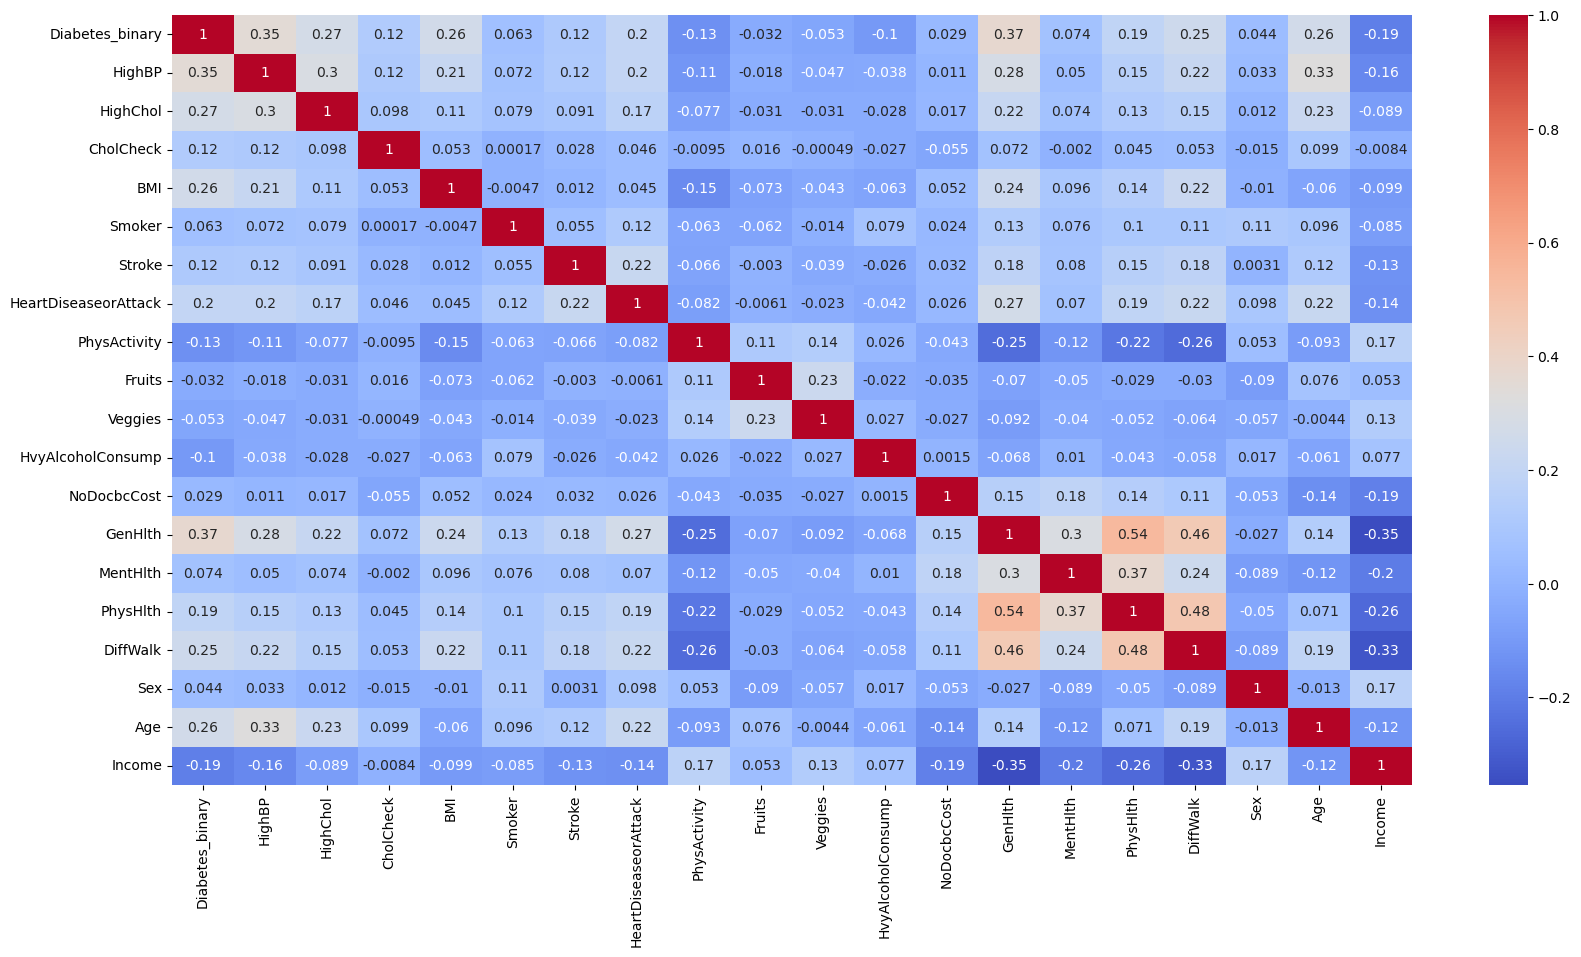

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(df_downsampled.corr(),annot=True , cmap ='coolwarm' )

In [38]:
# bmi (bar chart)
def tranform_bmi(x):
    if x < 18.5 :
        return 1
    elif 18.5 <= x <= 24.9 :
        return 2
    elif 25 <= x <= 29.9 :
        return 3
    else:
        return 4

In [39]:
df_downsampled['BMI_bins'] = df_downsampled["BMI"].apply(tranform_bmi)

<Axes: xlabel='BMI_bins', ylabel='count'>

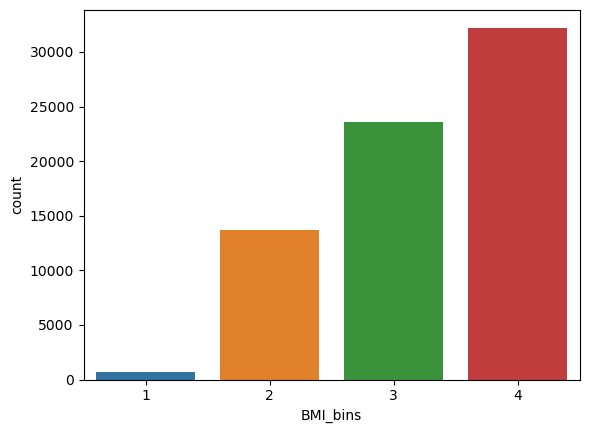

In [40]:
sns.countplot(x='BMI_bins', data=df_downsampled)

In [41]:
del df_downsampled["BMI"]

In [42]:
# Model building

In [43]:
X = df_downsampled.iloc[:, 1:22].values
y = df_downsampled.iloc[:, 0].values

y

array([0, 0, 0, ..., 1, 1, 1])

In [44]:
# Creating train,test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print("Length of train set: ", X_train.shape, "y:", y_train.shape)
print("Length of test set: ", X_test.shape, "y:", y_test.shape)

Length of train set:  (56155, 19) y: (56155,)
Length of test set:  (14039, 19) y: (14039,)


MLP Classifier - 2 Hidden Layer

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from numpy import arange

def evaluate_mlp(mlp, X_train, y_train, X_test, y_test):
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    mlp_acc = accuracy_score(y_test, y_pred)
    mlp_pre = precision_score(y_test, y_pred, average='micro')
    mlp_recall = recall_score(y_test, y_pred, average='micro')
    mlp_f1 = f1_score(y_test, y_pred, average='micro')
    mlp_mse = mean_squared_error(y_test, y_pred)

    print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
    print("MLP - Precision: {:.3f}.".format(mlp_pre))
    print("MLP - Recall: {:.3f}.".format(mlp_recall))
    print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
    print("MLP - Mean Squared Error: {:.3f}.".format(mlp_mse))
    print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print ('\n Clasification Report:\n', classification_report(y_test,y_pred))

if __name__ == "__main__":
    mlp = MLPClassifier(random_state = 1, hidden_layer_sizes=(200, 100))
    evaluate_mlp(mlp, X_train, y_train, X_test, y_test)

C:\Users\Justin-GPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Accuracy: 0.682.
MLP - Precision: 0.682.
MLP - Recall: 0.682.
MLP - F1_Score: 0.682.
MLP - Mean Squared Error: 0.318.

Confusion Matrix: 
 [[4740 2393]
 [2078 4828]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68      7133
           1       0.67      0.70      0.68      6906

    accuracy                           0.68     14039
   macro avg       0.68      0.68      0.68     14039
weighted avg       0.68      0.68      0.68     14039



Keras Tuner

In [47]:
from sklearn.neural_network import MLPClassifier
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

def build_model(hp):
  model = MLPClassifier(hidden_layer_sizes = (200, 100),
      activation = hp.Choice('activation', ['logistic', 'tanh', 'relu']),
      solver = hp.Choice('solver', ['lbfgs', 'sgd', 'adam']),
      learning_rate = hp.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
      random_state = hp.Int('random_state', min_value = 0, max_value = 10, step = 1)
  )
  return model

tuner = kt.SklearnTuner(oracle = kt.oracles.BayesianOptimizationOracle(objective = kt.Objective('score', 'max'),
        max_trials = 10), hypermodel = build_model, cv = StratifiedKFold(5), overwrite = True)

tuner.search(X_train, y_train)

print()
best_model = tuner.get_best_models(num_models=1)[0]
best_model

Trial 10 Complete [00h 09m 36s]
score: 0.7358739203988959

Best score So Far: 0.7359451518119491
Total elapsed time: 01h 28m 35s
INFO:tensorflow:Oracle triggered exit



MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 100),
              learning_rate='invscaling', random_state=4, solver='lbfgs')

In [48]:
tuner.results_summary(num_trials = 10)

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="score", direction="max")

Trial 02 summary
Hyperparameters:
activation: logistic
solver: lbfgs
learning_rate: invscaling
random_state: 4
Score: 0.7359451518119491

Trial 09 summary
Hyperparameters:
activation: tanh
solver: lbfgs
learning_rate: constant
random_state: 4
Score: 0.7358739203988959

Trial 05 summary
Hyperparameters:
activation: logistic
solver: lbfgs
learning_rate: constant
random_state: 1
Score: 0.7354821476271036

Trial 01 summary
Hyperparameters:
activation: logistic
solver: adam
learning_rate: invscaling
random_state: 9
Score: 0.7352506455346808

Trial 04 summary
Hyperparameters:
activation: tanh
solver: lbfgs
learning_rate: invscaling
random_state: 3
Score: 0.735019143442258

Trial 00 summary
Hyperparameters:
activation: tanh
solver: lbfgs
learning_rate: adaptive
random_state: 1
Score: 0.7348232570563619

Trial 08 summary
Hyperparameters:
activation: logistic
solver: sgd
learning_rate:

In [50]:
mlp_best = best_model

mlp_best.fit(X_train,y_train)
y_pred_best = mlp_best.predict(X_test)

mlp_best_acc = accuracy_score(y_test, y_pred_best)
mlp_best_pre = precision_score(y_test, y_pred_best, average='micro')
mlp_best_recall = recall_score(y_test, y_pred_best, average='micro')
mlp_best_f1 = f1_score(y_test, y_pred_best, average='micro')
mlp_best_mse = mean_squared_error(y_test, y_pred_best)

print("MLP - Accuracy: {:.3f}.".format(mlp_best_acc))
print("MLP - Precision: {:.3f}.".format(mlp_best_pre))
print("MLP - Recall: {:.3f}.".format(mlp_best_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_best_f1))
print("MLP - Mean Squared Error: {:.3f}.".format(mlp_best_mse))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_best))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred_best))

C:\Users\Justin-GPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP - Accuracy: 0.732.
MLP - Precision: 0.732.
MLP - Recall: 0.732.
MLP - F1_Score: 0.732.
MLP - Mean Squared Error: 0.268.

Confusion Matrix: 
 [[4929 2204]
 [1557 5349]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      7133
           1       0.71      0.77      0.74      6906

    accuracy                           0.73     14039
   macro avg       0.73      0.73      0.73     14039
weighted avg       0.73      0.73      0.73     14039

